<a href="https://colab.research.google.com/github/Kalo-ch/TalentoTech_/blob/main/Laboratorio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio # 1
## Temas: Limpieza de Datos, análisis de negocio, integración de fuentes de datos


# 1. El problema del negocio

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

 ¿Qué perfil tienen los clientes con mayor potencial de conversión?



# 2. El set de datos

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (dataset_banco.csv) con 45215 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age": edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual de ingresos en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

# 3. Una primera mirada al dataset

In [75]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt #permite crear graficas
import seaborn as sns #permite crear graficas

In [76]:
#Lectura
from google.colab import drive
drive.mount('/content/drive')

#ruta = "/content/dirve/MyDrive/ESCRIBE LA RUTA DE ARCHIVO CSV"
#data=pd.read_csv(ruta)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
ruta = '/content/drive/MyDrive/Colab Notebooks/Intro TalentoTech/data/csv/dataset_banco.csv'
df_banco=pd.read_csv(ruta)

In [2]:
#Obtener archivos sin conexion al drive

from google.colab import files
uploaded = files.upload()

Saving dataset_banco.csv to dataset_banco.csv


In [3]:
#Carga de datos sin autorizacion de Drive (opcion 2)
df=pd.read_csv('/content/dataset_banco.csv')

In [78]:
#Validacion de nombres sin transformacion
print(df_banco.shape)
df_banco.head()

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


# Visualización y Exploración de Datos:

* df.head(): Muestra las primeras filas del DataFrame.
* df.tail(): Muestra las últimas filas del DataFrame.
* df.info(): Muestra información sobre el DataFrame, incluyendo tipos de datos y valores no nulos.
* df.describe(): Proporciona estadísticas descriptivas para columnas numéricas.
* df.shape: Devuelve una tupla con la cantidad de filas y columnas del DataFrame.
* df.columns: Devuelve una lista con los nombres de las columnas del DataFrame.

In [ ]:
#proporciona visualizacion y exploracion de datos con el dataset cargado

In [79]:
df_banco.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [80]:
df_banco.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45210,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1.0,0,unknown,yes
45211,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,yes
45212,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3,success,yes
45213,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,no
45214,37,entrepreneur,married,secondary,no,2971.0,no,no,cellular,17,nov,361.0,2,188.0,11,other,no


In [81]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [82]:
df_banco.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45215.000000,45213.000000,45215.000000,45214.000000,45215.000000,45214.000000,45215.000000
mean,41.004711,1374.159866,15.805839,258.074357,2.763729,40.192485,0.580383
std,12.036647,3924.255525,8.322473,257.605175,3.097910,100.120622,2.303438
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [83]:
df_banco.shape

(45215, 17)

In [84]:
df_banco.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

# Transformacion de nombres de atributos

In [ ]:
#cambia los nombres de las columnas del dataframe
# Renombramos las columnas
data_rename_2 = df.rename(columns={
                                  'age':        'edad',
                                  'job':        'trabajo',
                                  'marital':    'estado_civil',
                                  'education':  'educacion',
                                  'default':    'morosidad',
                                  'balance':    'saldo',
                                  'housing':    'vivienda',
                                  'loan':       'prestamo',
                                  'contact':    'contacto',
                                  'day':        'dia',
                                  'month':      'mes',
                                  'duration':   'duracion',
                                  'campaign':   'campana',
                                  'pdays':      'dias_previos',
                                  'previous':   'anterior',
                                  'poutcome':   'resultado',
                                  'y':          'respuesta'})

# Verificamos los cambios
print(data_rename_2.head())

In [85]:
# Renombrar las columnas #2
df_banco.columns = ['edad',
              'trabajo',
              'estado_civil',
              'educacion',
              'incumplimiento',
              'saldo',
              'vivienda',
              'prestamo',
              'contacto',
              'dia',
              'mes',
              'duracion',
              'campaña',
              'dias_previos',
              'anterior',
              'resultado_prev',
              'respuesta']

print(df_banco.columns)

Index(['edad', 'trabajo', 'estado_civil', 'educacion', 'incumplimiento',
       'saldo', 'vivienda', 'prestamo', 'contacto', 'dia', 'mes', 'duracion',
       'campaña', 'dias_previos', 'anterior', 'resultado_prev', 'respuesta'],
      dtype='object')


In [86]:
#visualiza las primeras líneas de tu .csv
df_banco.head()

,edad,trabajo,estado_civil,educacion,incumplimiento,saldo,vivienda,prestamo,contacto,dia,mes,duracion,campaña,dias_previos,anterior,resultado_prev,respuesta
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [87]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   edad            45215 non-null  int64  
 1   trabajo         45213 non-null  object 
 2   estado_civil    45214 non-null  object 
 3   educacion       45214 non-null  object 
 4   incumplimiento  45215 non-null  object 
 5   saldo           45213 non-null  float64
 6   vivienda        45215 non-null  object 
 7   prestamo        45215 non-null  object 
 8   contacto        45215 non-null  object 
 9   dia             45215 non-null  int64  
 10  mes             45215 non-null  object 
 11  duracion        45214 non-null  float64
 12  campaña         45215 non-null  int64  
 13  dias_previos    45214 non-null  float64
 14  anterior        45215 non-null  int64  
 15  resultado_prev  45215 non-null  object 
 16  respuesta       45215 non-null  object 
dtypes: float64(3), int64(4), object

In [88]:
#Visualiza las variables categoricas y las numericas
#clasificar columnas
categoricas=df_banco.select_dtypes(include=['object']).columns.tolist()
numericas = df_banco.select_dtypes(include=['int64', 'float64']).columns.tolist()
print('columnas categoricas ' , categoricas)
print('Columnas numericas ', numericas)


columnas categoricas  ['trabajo', 'estado_civil', 'educacion', 'incumplimiento', 'vivienda', 'prestamo', 'contacto', 'mes', 'resultado_prev', 'respuesta']
Columnas numericas  ['edad', 'saldo', 'dia', 'duracion', 'campaña', 'dias_previos', 'anterior']


In [89]:
#contar los diferentes respuestas de la columnas trabajo.
pd.value_counts(df_banco['trabajo'])

trabajo
blue-collar       9731
management        9455
technician        7599
admin.            5168
services          4153
retired           2263
self-employed     1578
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
unknown            288
administrative       3
Management           2
MANAGEMENT           2
Self-employed        1
Services             1
Retired              1
Name: count, dtype: int64

In [90]:
#proporciona estadisticas desciptivas para columnas numericas
pd.value_counts(df_banco['campaña'])


campaña
1     17546
2     12507
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: count, dtype: int64

# 4. Limpieza
Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (outliers) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos íntegro, listo para la fase de Análisis Exploratorio.

# 4.1 Datos faltantes
Acá comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 45.215. Sin embargo columnas como "job", "marital", "education", "balance", "duration" y "pdays".

Por ser tan pocos los datos faltantes optaremos por eliminar las filas correspondientes:

In [91]:
#Comando para contar los valores faltantes de mi dataframe
df_banco.isna().sum()

edad              0
trabajo           2
estado_civil      1
educacion         1
incumplimiento    0
saldo             2
vivienda          0
prestamo          0
contacto          0
dia               0
mes               0
duracion          1
campaña           0
dias_previos      1
anterior          0
resultado_prev    0
respuesta         0
dtype: int64

In [92]:
#Elimino los valores faltantes de mi dataframe
df_banco.dropna(inplace=True)

In [93]:
#conteo de valores por columna de mi dataframe
df_banco.count()

edad              45207
trabajo           45207
estado_civil      45207
educacion         45207
incumplimiento    45207
saldo             45207
vivienda          45207
prestamo          45207
contacto          45207
dia               45207
mes               45207
duracion          45207
campaña           45207
dias_previos      45207
anterior          45207
resultado_prev    45207
respuesta         45207
dtype: int64

In [118]:
#promp:contar la extension de letras en la columna educacion
df_banco['educacion'].apply(len)

0        8
1        9
2        9
3        7
4        7
        ..
45210    8
45211    7
45212    9
45213    9
45214    9
Name: educacion, Length: 45192, dtype: int64

## 4.2 Columnas irrelevantes
Una columna irrelevante puede ser:

Una columna que no contiene información relevante para el problema que queremos resolver. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
Una columna categórica pero con un sólo nivel. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
Una columna numérica pero con un sólo valor. Por ejemplo si en la columna "edad" todos los valores fuesen iguales a 50.
Columnas con información redundante. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.
Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

# **for col in cols_cat:**
Este es un bucle for que itera sobre cada elemento en la lista cols_cat. La variable col tomará el valor de cada elemento en cada iteración del bucle.

* print(f'Columna {col}: {data[col].nunique()} subniveles'): Dentro del bucle, esta línea de código imprime un mensaje que indica el nombre de la columna (col), seguido por el número de subniveles únicos en esa columna.

* f'Columna {col}: {data[col].nunique()} subniveles': Esta es una cadena de formato (f-string) que contiene dos variables: {col}: Representa el nombre de la columna actual en la iteración del bucle. {data[col].nunique()}: Representa el número de subniveles únicos en la columna actual. data[col] selecciona la columna actual del DataFrame y .nunique() calcula el número de valores únicos en esa columna.

In [94]:
#conteo de los niveles en las diferentes columnas categoricas
cols_cat= ['trabajo', 'estado_civil', 'educacion', 'incumplimiento', 'vivienda', 'prestamo', 'contacto', 'mes', 'resultado_prev', 'respuesta']

#ciclo for para contar los unicos subniveles por variables categoricas nunique
for col in cols_cat:
  print(f'Columna {col}:{df_banco[col].nunique() } subniveles ')

Columna trabajo:18 subniveles 
Columna estado_civil:6 subniveles 
Columna educacion:10 subniveles 
Columna incumplimiento:2 subniveles 
Columna vivienda:2 subniveles 
Columna prestamo:6 subniveles 
Columna contacto:5 subniveles 
Columna mes:12 subniveles 
Columna resultado_prev:6 subniveles 
Columna respuesta:2 subniveles 


In [95]:
#conteo los valores
pd.value_counts(df_banco['trabajo'])

trabajo
blue-collar       9730
management        9454
technician        7597
admin.            5166
services          4153
retired           2263
self-employed     1578
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
unknown            288
administrative       3
Management           2
MANAGEMENT           2
Self-employed        1
Services             1
Retired              1
Name: count, dtype: int64

Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:

Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

La **desviación estándar** es una medida que nos indica qué tan dispersos o alejados están los valores de un conjunto de datos respecto a su media o promedio. En otras palabras, nos ayuda a entender cuánto varían los valores individuales de un conjunto de datos con respecto a su valor promedio.

Imagina que tienes un conjunto de datos que representa las alturas de estudiantes en una clase. Si la desviación estándar es baja, significa que la mayoría de los estudiantes tienen alturas muy similares entre sí y cercanas a la altura promedio de la clase. Por otro lado, si la desviación estándar es alta, significa que las alturas de los estudiantes están muy dispersas, algunos son muy altos y otros muy bajos en comparación con la altura promedio.

Entonces, la desviación estándar nos da una idea de la dispersión o variabilidad de los datos alrededor de su promedio. Una desviación estándar baja indica que los datos están más agrupados alrededor del promedio, mientras que una desviación estándar alta indica que los datos están más dispersos o separados del promedio.

In [96]:
#Calcular la desviacion estandar para las columnas numericas
desviaciones_estandar=df_banco[['edad','saldo','dia','duracion','campaña','dias_previos','anterior']].std()

#imprimir las desviaciones estandar
print(desviaciones_estandar)

edad              12.037399
saldo           3924.491665
dia                8.323015
duracion         257.460759
campaña            3.098058
dias_previos     100.103283
anterior           2.303341
dtype: float64


In [97]:
#desviacion estandar para la variable 'pdays' = 'dias_previos
dest_pdays= df_banco['dias_previos'].std()

#imprimir las desviaciones estandar
print(dest_pdays)

100.10328306134589


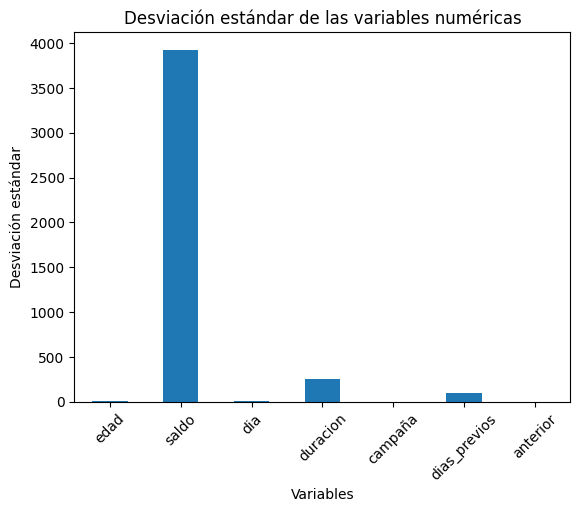

In [98]:
#crear una grafica de barras para respresentar las desviaciones estandar
desviaciones_estandar.plot(kind= 'bar')
plt.title('Desviación estándar de las variables numéricas')
plt.xlabel('Variables')
plt.ylabel('Desviación estándar')
plt.xticks(rotation=45)
plt.show()

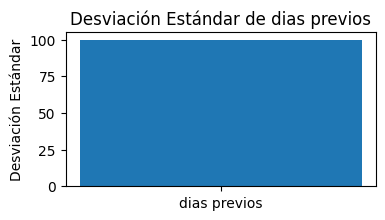

In [99]:
#Graficar la desviacion estandar de pdays
plt.figure(figsize=(4, 2))  # Configura el tamaño de la figura
plt.bar('dias previos', dest_pdays)  # Crea una barra para la desviación estándar de 'pdays'
plt.title('Desviación Estándar de dias previos')
plt.ylabel('Desviación Estándar')
plt.show()

In [100]:
# Calcula la media del atributo "pdays: dias de contacto al usuario antes de la campaña actual"
media = df_banco['dias_previos'].mean()

print("Promedio de dias de contacto:", media)

Promedio de dias de contacto: 40.17822461123277


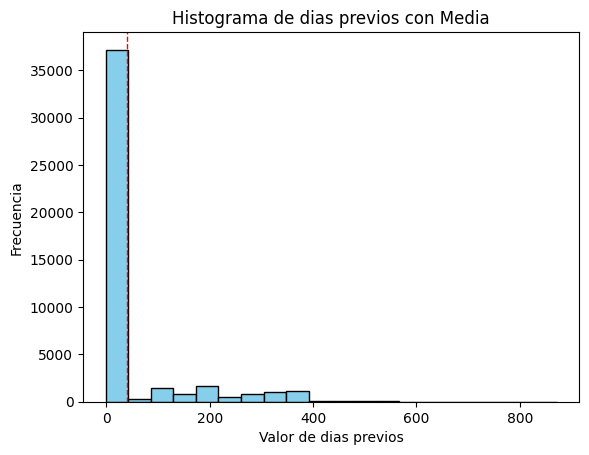

In [101]:
# Graficar un histograma del atributo "pdays" = "dias previos"
plt.hist(df_banco['dias_previos'], bins=20, color='skyblue', edgecolor='black')

# Agregar una línea vertical para mostrar la media
plt.axvline(media, color='red', linestyle='dashed', linewidth=1)

# Etiquetas y título
plt.xlabel('Valor de dias previos')
plt.ylabel('Frecuencia')
plt.title('Histograma de dias previos con Media')

# Mostrar la gráfica
plt.show()

# Clase 24/06/2024

# 4.3 Filas repetidas

In [102]:
#Mostramos la cantidad de registros antes de aplicar una transformación, limpieza o filtro
print(f'Tamaño del set antes de eliminar las filas repetidas: {df_banco.shape}')
df_banco.drop_duplicates(inplace=True)

#Mostramos la cantidad de registros después de aplicar una transformación, limpieza o filtro
print(f'Tamaño del set después de eliminar las filas repetidas: {df_banco.shape}')

Tamaño del set antes de eliminar las filas repetidas: (45207, 17)
Tamaño del set después de eliminar las filas repetidas: (45203, 17)


# 4.4 Outliers en las variables numéricas

No siempre se deben eliminar los outliers porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:

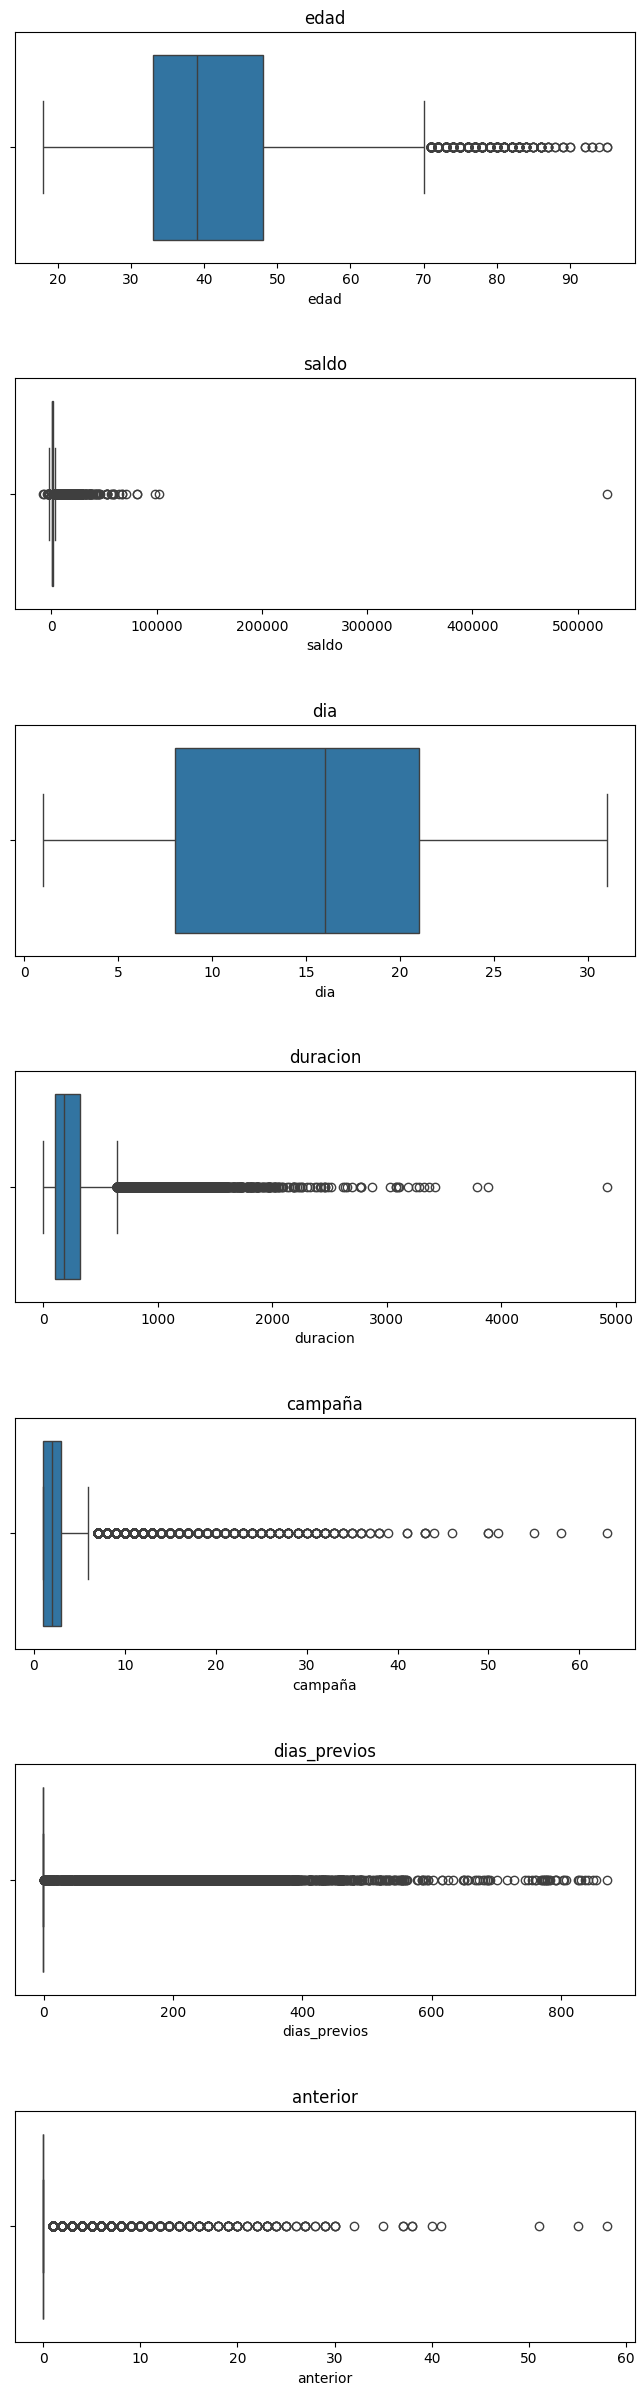

In [117]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = ['edad', 'saldo', 'dia', 'duracion', 'campaña',
            'dias_previos', 'anterior']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data = df_banco, ax=ax[i])
    ax[i].set_title(col)

**Observaciones:**

* "age"="Edad": hay sujetos con edades mucho mayores a 100 años
* "duration" = "duracion": hay valores negativos
* "previous" = "Anteior" : hay un valor extremadamente alto (cercano a 300)

In [104]:
# Eliminar filas con "edad">100
print(f'Tamaño del set antes de eliminar registros de edad: {df_banco.shape}')
df_banco = df_banco.drop(df_banco[df_banco['edad'] > 100].index)

#df_banco = df_banco.drop(df_banco[df_banco['edad'] > 100]
print(f'Tamaño del set después de eliminar registros de edad: {df_banco.shape}')

Tamaño del set antes de eliminar registros de edad: (45203, 17)
Tamaño del set después de eliminar registros de edad: (45195, 17)


In [105]:
# Eliminar filas con "duracion"<0
print(f'Tamaño del set antes de eliminar registros de duración: {df_banco.shape}')
df_banco = df_banco.drop(df_banco[df_banco['duracion'] < 0].index)

#df_banco = df_banco.drop(df_banco[df_banco['duracion'] < 0]
print(f'Tamaño del set después de eliminar registros de duración: {df_banco.shape}')

Tamaño del set antes de eliminar registros de duración: (45195, 17)
Tamaño del set después de eliminar registros de duración: (45193, 17)


In [107]:
# Eliminar filas con "anterior">100
print(f'Tamaño del set antes de eliminar registros de anterior: {df_banco.shape}')
df_banco = df_banco.drop(df_banco[df_banco['anterior'] > 100].index)

#df_banco = df_banco.drop(df_banco[df_banco['anterior'] > 100]
print(f'Tamaño del set después de eliminar registros de anterior: {df_banco.shape}')

Tamaño del set antes de eliminar registros de anterior: (45193, 17)
Tamaño del set después de eliminar registros de anterior: (45192, 17)


# 4.5 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles

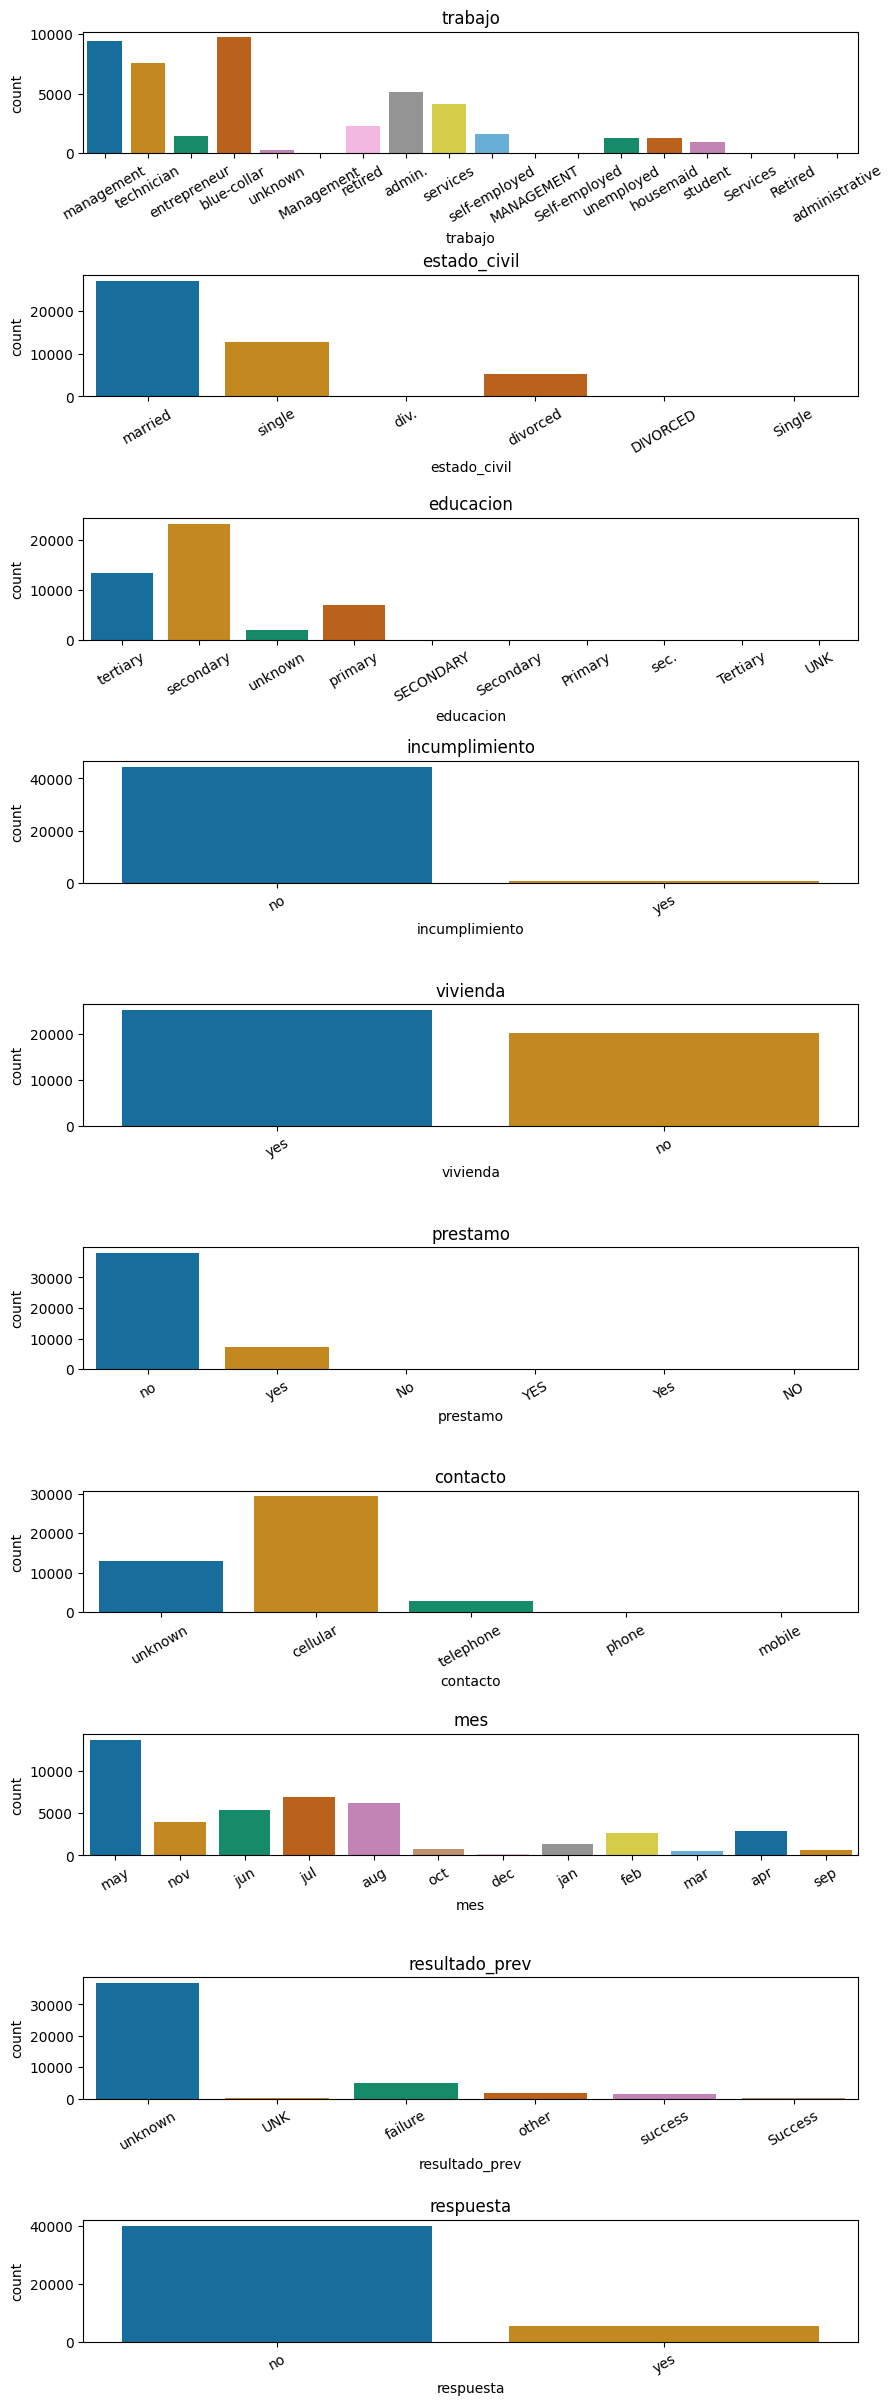

In [108]:
# Graficar los subniveles de cada variable categórica
cols_cat = ['trabajo', 'estado_civil', 'educacion', 'incumplimiento', 'vivienda', 'prestamo', 'contacto', 'mes', 'resultado_prev', 'respuesta']

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, hue=col, data=df_banco, ax=ax[i], palette= 'colorblind', legend=False)
  ax[i].set_title(col)
  ax[i].tick_params(axis='x', labelrotation=30)

Inicialmente se observa que hay sub-niveles con el mismo nombre pero escritos en minúscula, en mayúscula o con la primera letra en mayúscula.

Unifiquemos estos sub-niveles inicialmente:

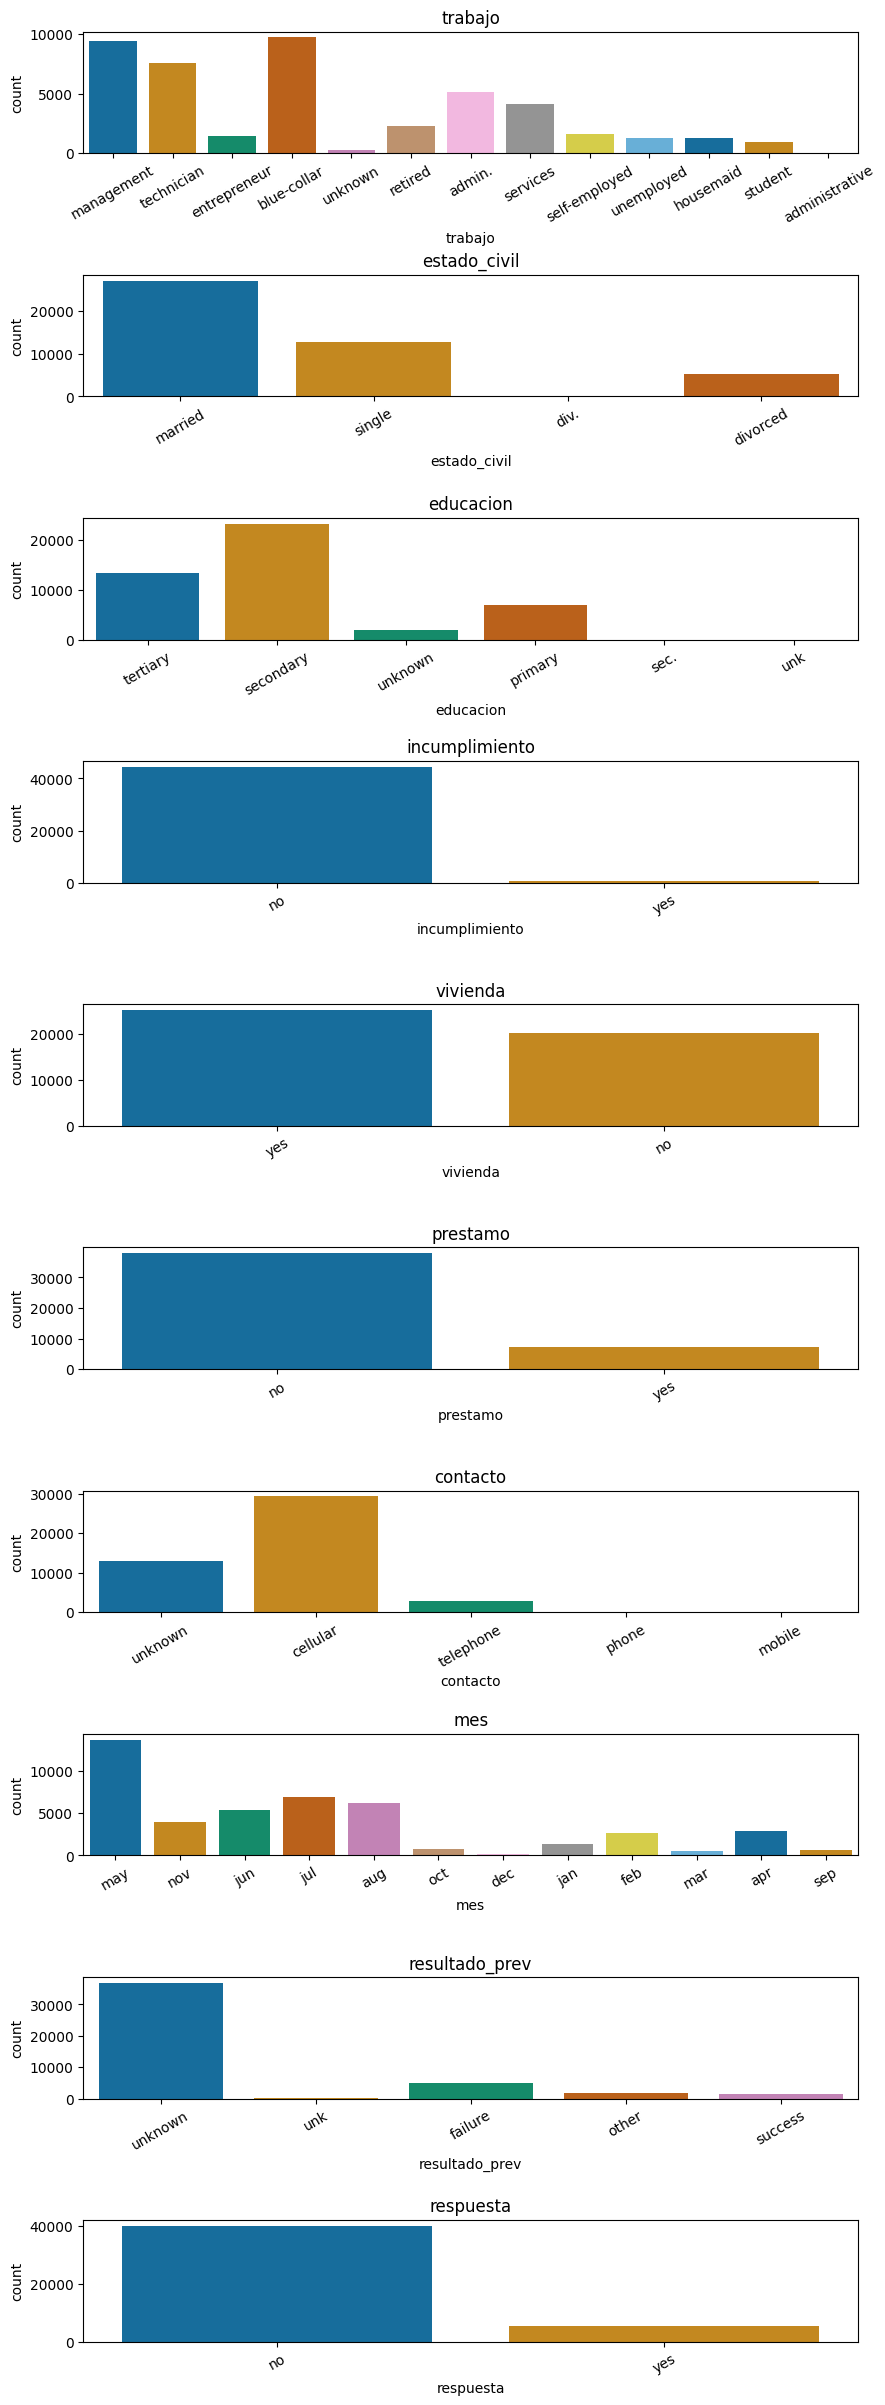

In [109]:
for column in df_banco.columns:
    # Representar en minúsculas sólo si la columna es categórica
    if column in cols_cat:
        df_banco[column] = df_banco[column].str.lower()

# Y generemos las gráficas nuevamente
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, hue=col, data=df_banco, ax=ax[i], palette='colorblind', legend=False)
  ax[i].set_title(col)
  ax[i].tick_params(axis='x', labelrotation=30)

In [113]:
# trabajo: unificar admin. y administrative
print(df_banco['trabajo'].unique())
df_banco['trabajo'] = df_banco['trabajo'].str.replace('admin.','administrative', regex=False)
print(df_banco['trabajo'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'administrative']
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']


In [112]:
# estado civil: unificar div. y divorced
print(df_banco['estado_civil'].unique())
df_banco['estado_civil'] = df_banco['estado_civil'].str.replace('div.','divorced', regex=False)
print(df_banco['estado_civil'].unique())

['married' 'single' 'div.' 'divorced']
['married' 'single' 'divorced']


In [114]:
# educacion: unificar sec. y secondary, unk y unknown
print(df_banco['educacion'].unique())
df_banco['educacion'] = df_banco['educacion'].str.replace('sec.','secondary', regex=False)
df_banco.loc[df_banco['educacion']=='unk','educacion'] = 'unknown'
print(df_banco['educacion'].unique())

['tertiary' 'secondary' 'unknown' 'primary' 'sec.' 'unk']
['tertiary' 'secondary' 'unknown' 'primary']


In [115]:
# contacto: unificar telephone y phone
print(df_banco['contacto'].unique())
df_banco.loc[df_banco['contacto']=='phone','contacto'] = 'telephone'
df_banco.loc[df_banco['contacto']=='mobile','contacto'] = 'cellular'
print(df_banco['contacto'].unique())

['unknown' 'cellular' 'telephone' 'phone' 'mobile']
['unknown' 'cellular' 'telephone']


In [116]:
# resultado: unificar unk y unknown
print(df_banco['resultado_prev'].unique())
df_banco.loc[df_banco['resultado_prev']=='unk','resultado_prev']='unknown'
print(df_banco['resultado_prev'].unique())

['unknown' 'unk' 'failure' 'other' 'success']
['unknown' 'failure' 'other' 'success']


In [119]:
#Verifico

#conteo de los niveles en las diferentes columnas categoricas
cols_cat= ['trabajo', 'estado_civil', 'educacion', 'incumplimiento', 'vivienda', 'prestamo', 'contacto', 'mes', 'resultado_prev', 'respuesta']

#ciclo for para contar los unicos subniveles por variables categoricas nunique
for col in cols_cat:
  print(f'Columna {col}:{df_banco[col].nunique() } subniveles ')

Columna trabajo:12 subniveles 
Columna estado_civil:3 subniveles 
Columna educacion:4 subniveles 
Columna incumplimiento:2 subniveles 
Columna vivienda:2 subniveles 
Columna prestamo:2 subniveles 
Columna contacto:3 subniveles 
Columna mes:12 subniveles 
Columna resultado_prev:4 subniveles 
Columna respuesta:2 subniveles 


In [121]:
df_banco.shape

(45192, 17)

# **FINALIZADO**

¡Y listo, ya hemos realizado la limpieza de nuestro set de datos!

Originalmente tenia 45.215 registros y 17 columnas. El dataset resultante tiene 45.192 filas (23 menos) y 17 columnas.

El set de datos ya está listo para Análisis Exploratorio.